Aplicar al Dataset los 4 métodos de regresión vistos hasta el momento (lineal simple, lineal múltiple, logarítmica, y polinomial).

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
#Conjunto de datos

#No me cargaron los datos pero se puede saltar el warning segun
# https://stackoverflow.com/questions/78428037/http-error-403-forbidden-when-import-library-fetch-california-housing-to-google

import warnings # import to ignore HTTP 403 error fetch_california_housing
warnings.filterwarnings("ignore") # import to ignore HTTP 403 error fetch_california_housing


california = fetch_california_housing()

#Se asigna un  dataframe
df = pd.DataFrame(california.data, columns=california.feature_names)
df['Target'] = california.target


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
# Número de valores en nul por columna
print(df.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64


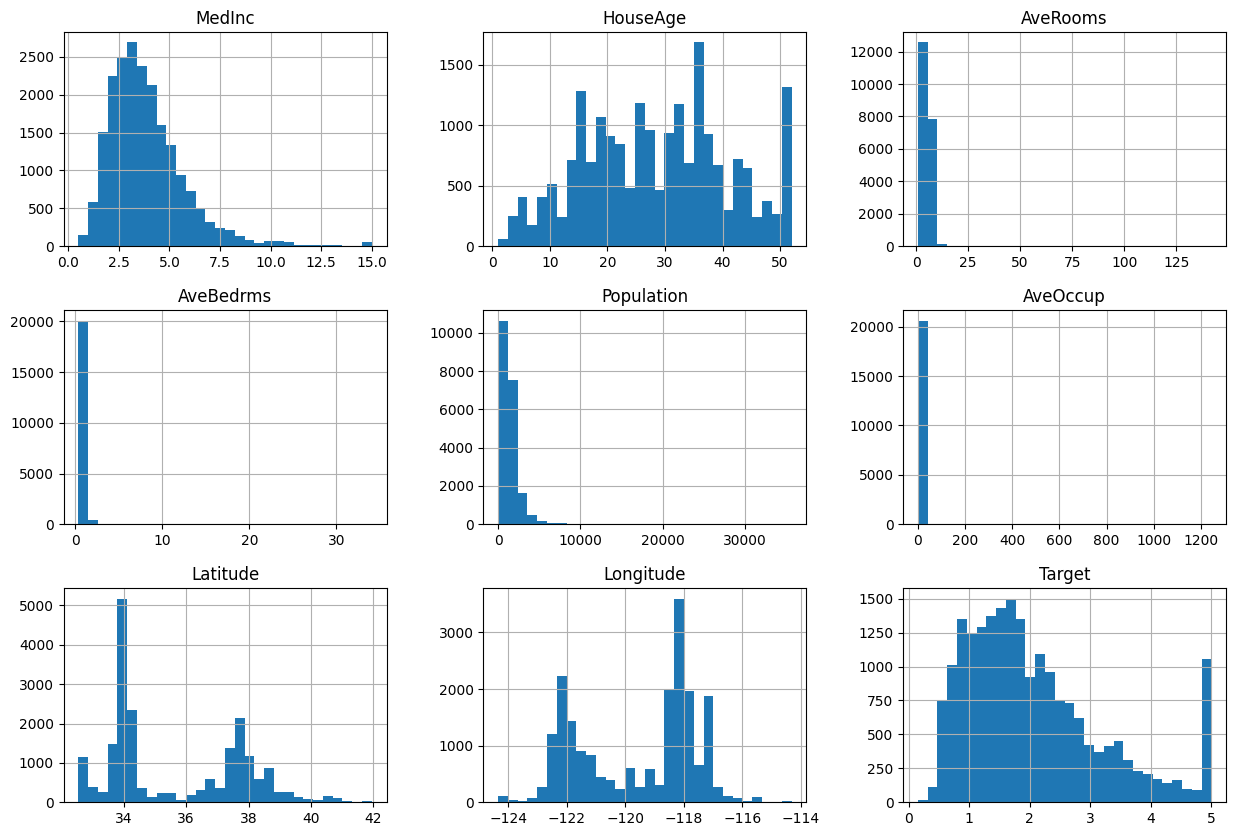

In [7]:
# Histograma por columna
df.hist(bins=30, figsize=(15, 10))
plt.show()

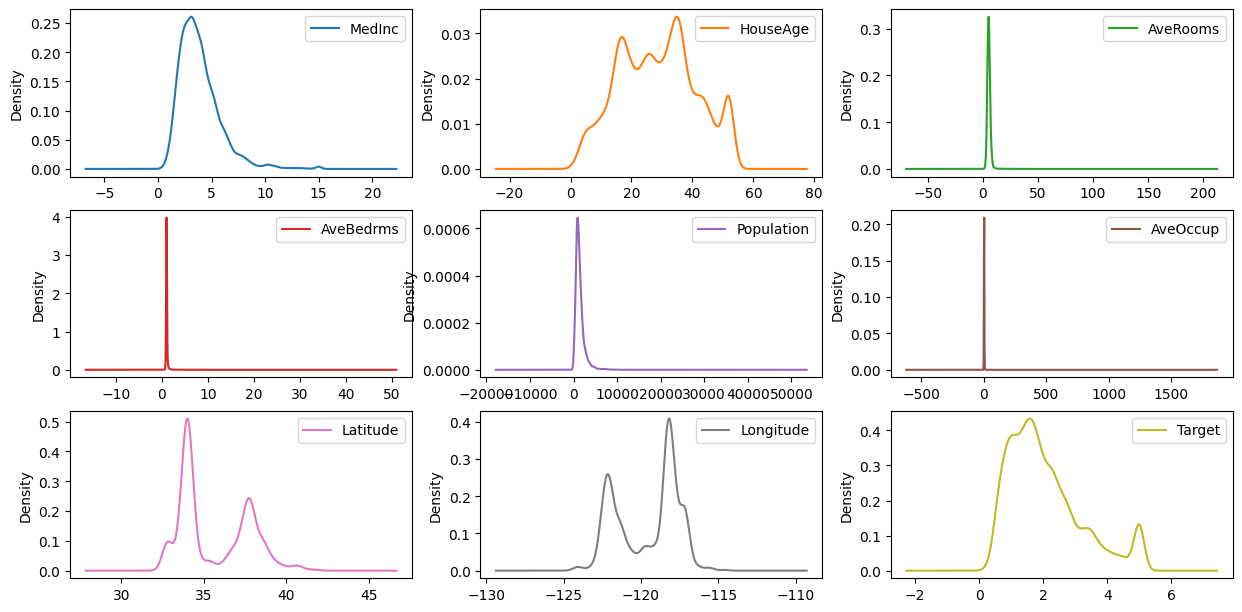

In [8]:
# KDE plot para cada característica
df.plot(kind='density', subplots=True, layout=(4, 3), sharex=False, figsize=(15, 10))
plt.show()

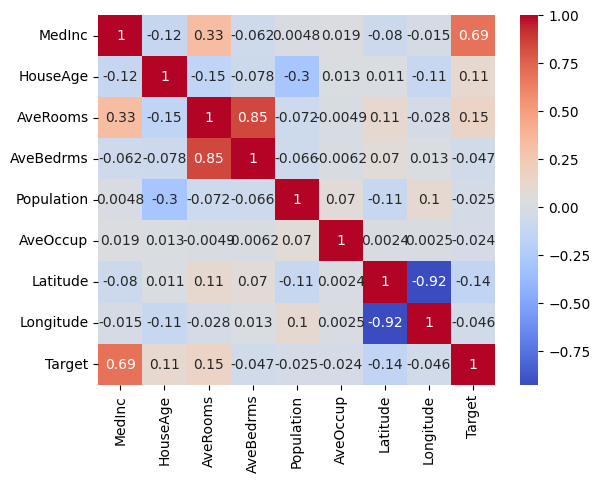

In [9]:
# Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

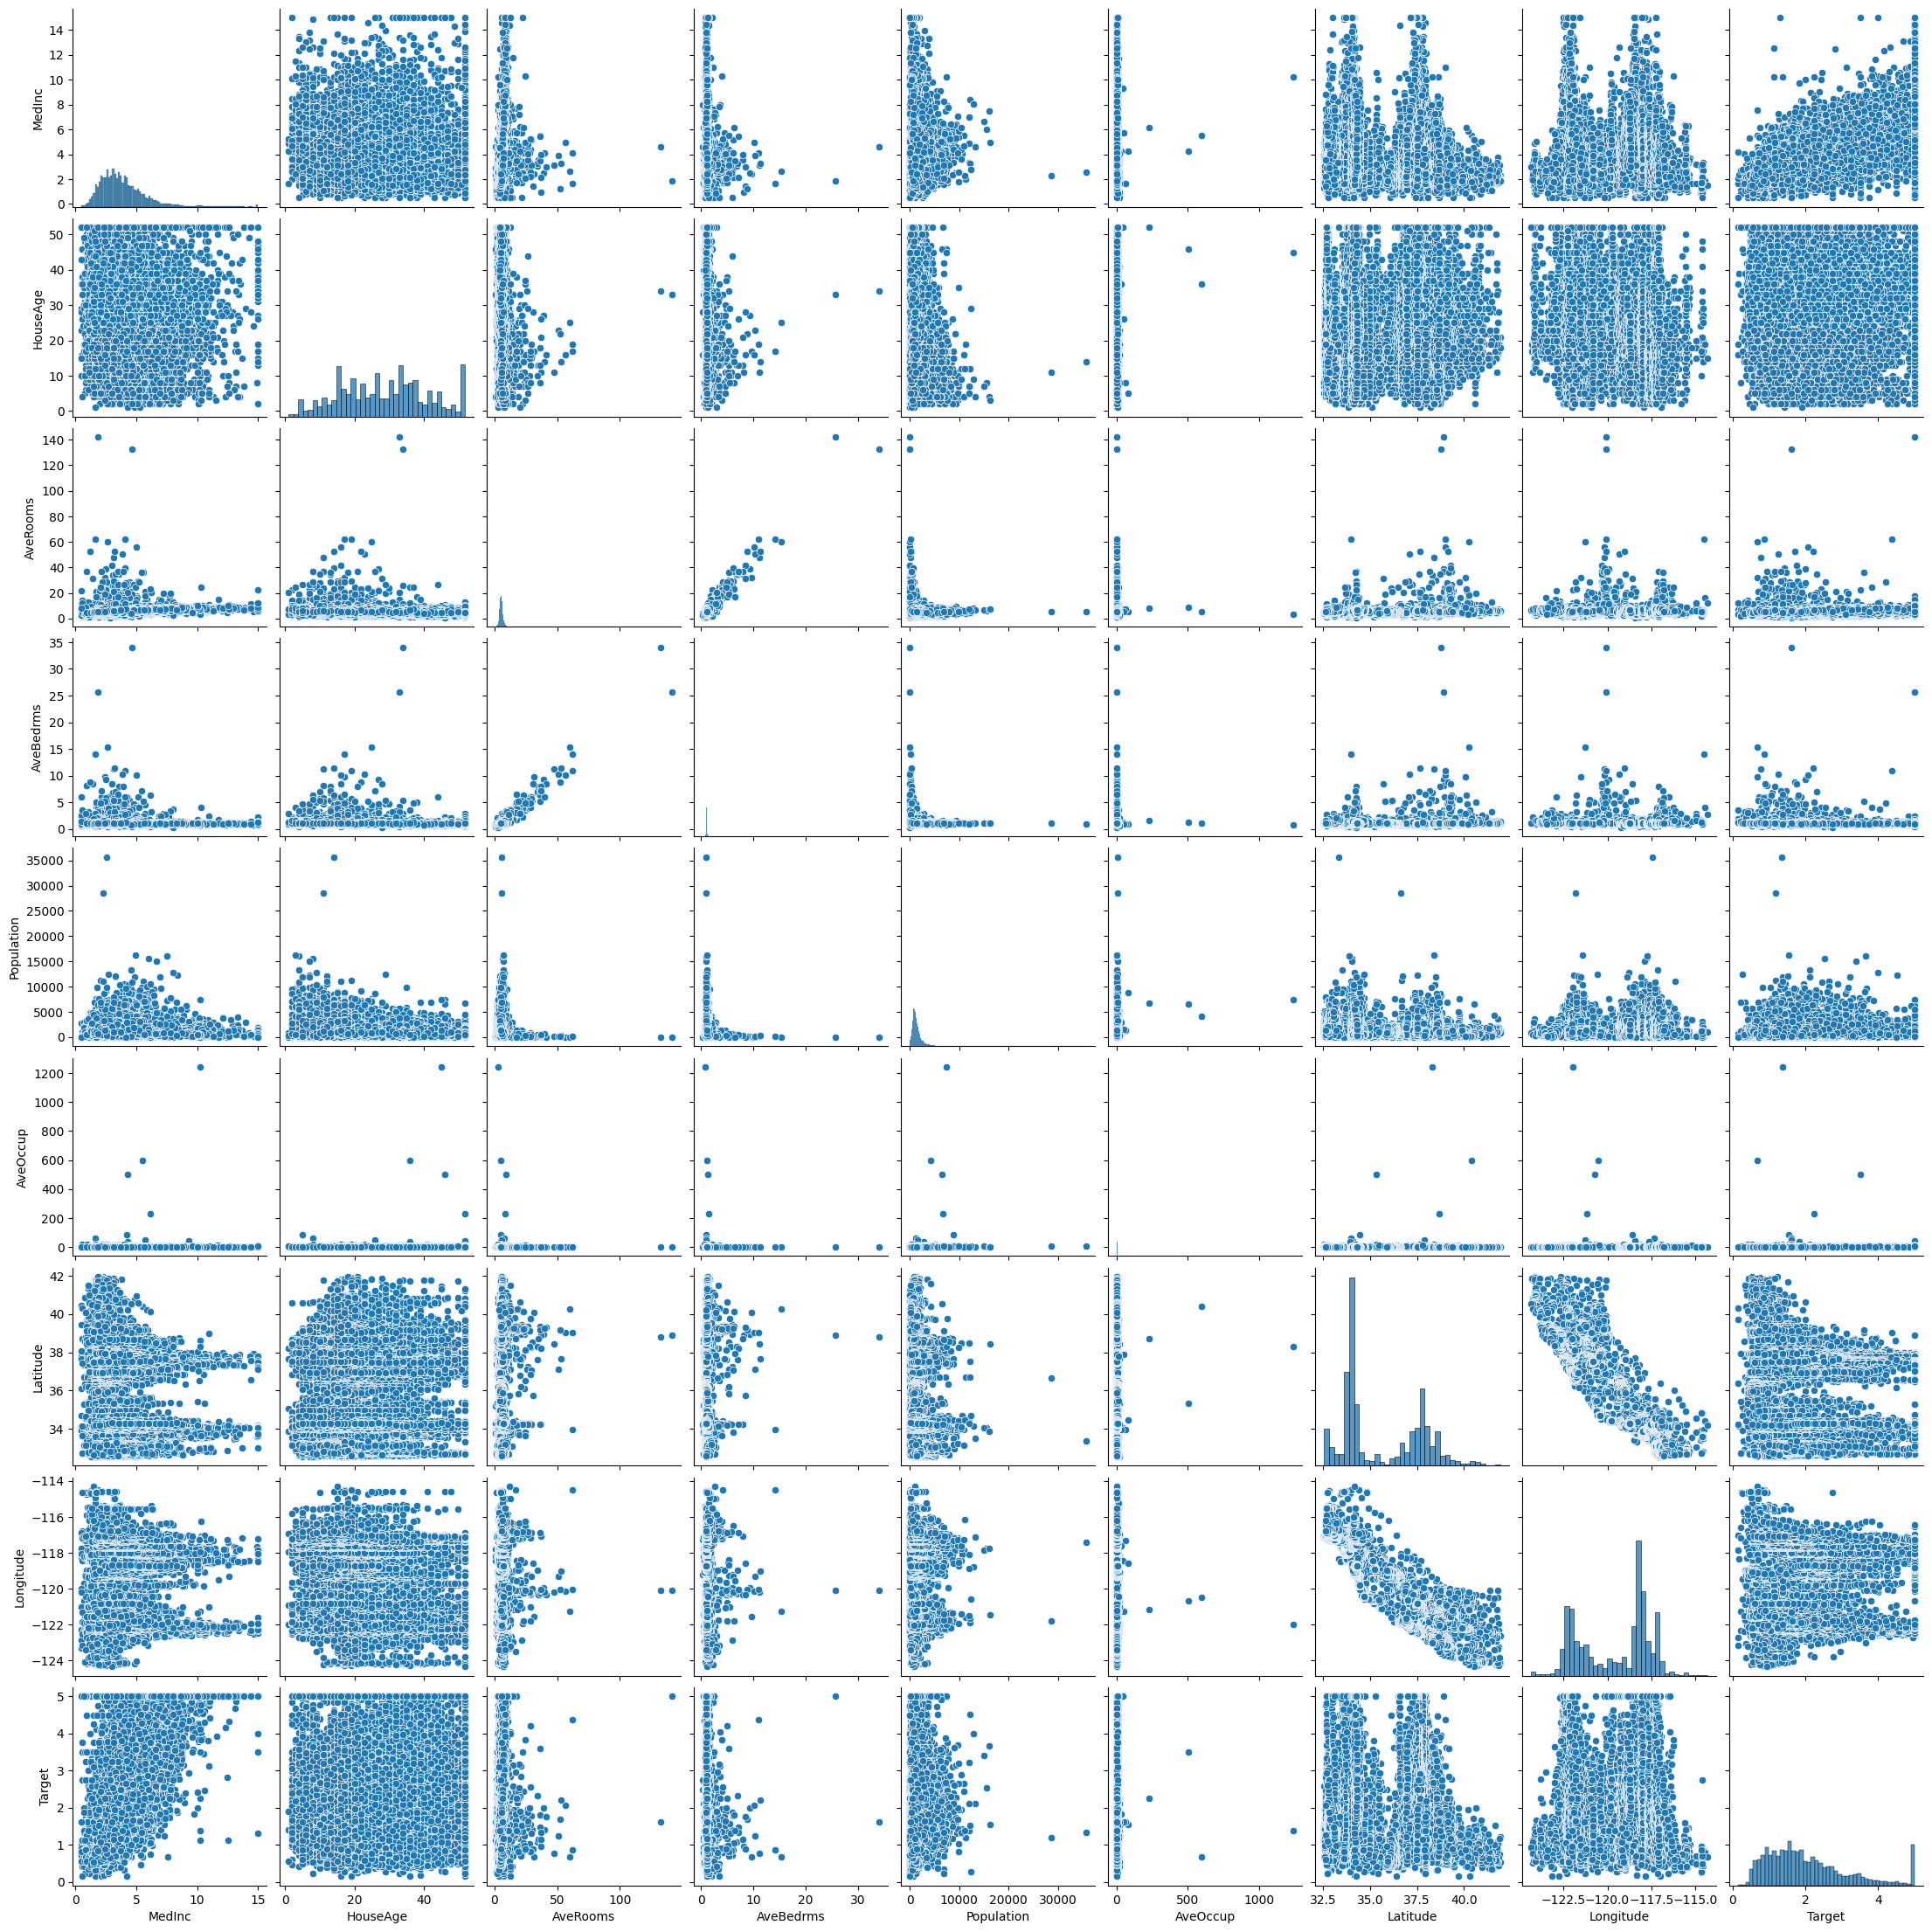

In [10]:
# Pairplot
sns.pairplot(df)
plt.show()

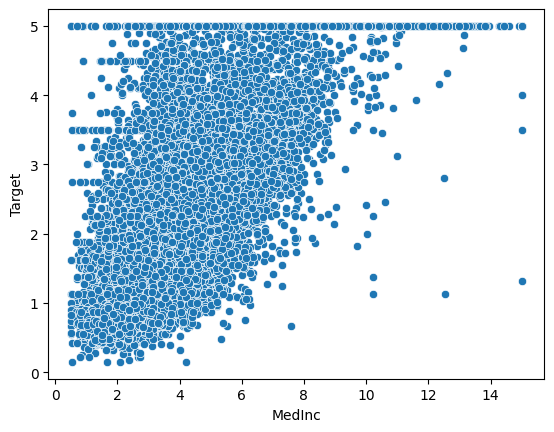

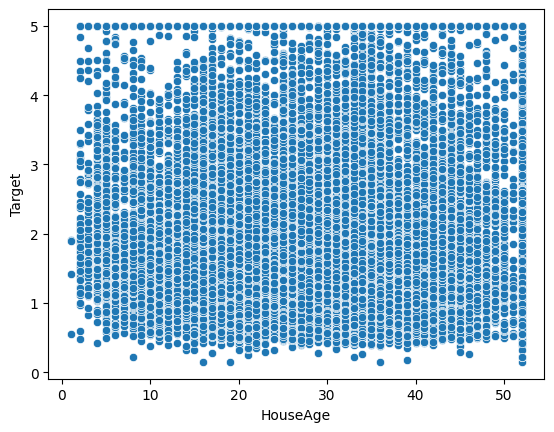

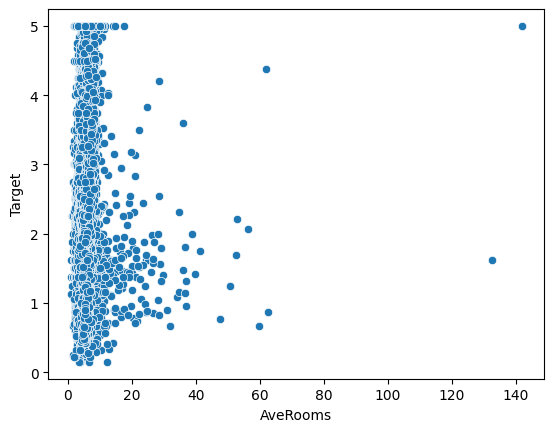

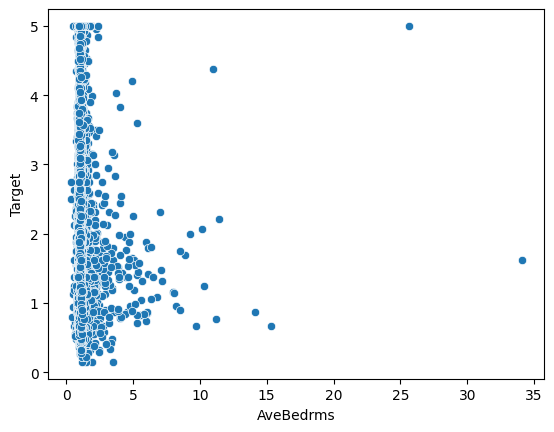

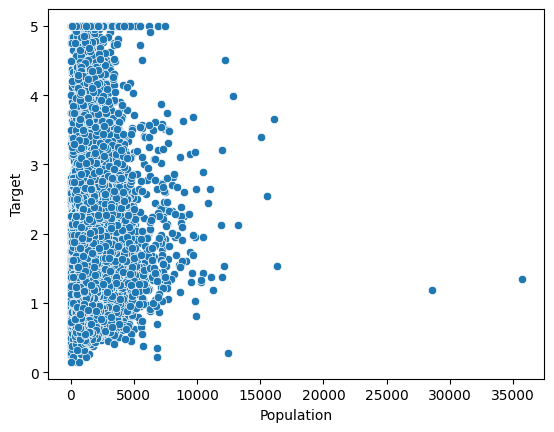

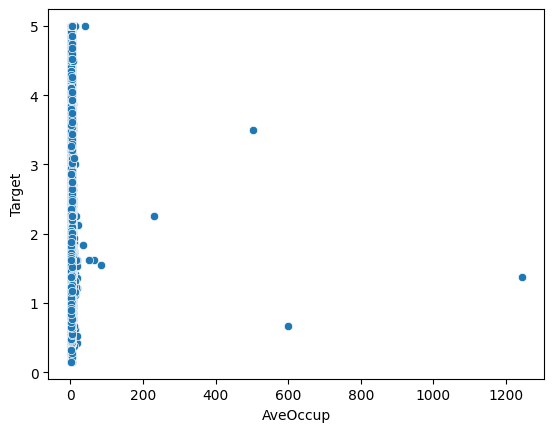

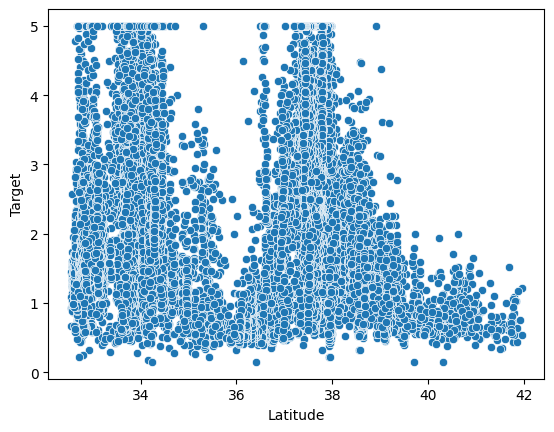

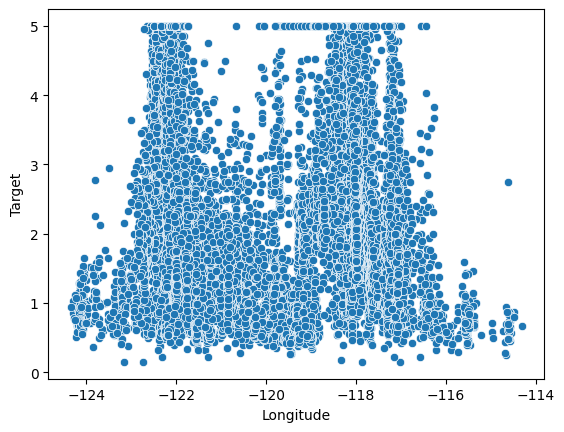

In [11]:
# Scatter plot entre características y el target
for column in df.columns:
    if column != 'Target':
        sns.scatterplot(x=df[column], y=df['Target'])
        plt.xlabel(column)
        plt.ylabel('Target')
        plt.show()

In [12]:
df1 = df
X = df1['MedInc'].to_numpy().reshape(-1, 1)
y = df1['Target'].to_numpy().reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MODELO DE REGRESION LENEAL

In [23]:
# Crear modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

In [24]:
model

LinearRegression()

In [14]:
#función print para mostrar
print(f"La pendiente (B) : {model.coef_}, el intersepto (A) es {model.intercept_}")


La pendiente (B) : [[0.41933849]], el intersepto (A) es [0.44459729]


In [25]:
# Predecir los valores para el conjunto de entrenamiento
y_pred = model.predict(X_test)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
14196  3.2596      33.0  5.017657   1.006421      2300.0  3.691814     32.71   
8267   3.8125      49.0  4.473545   1.041005      1314.0  1.738095     33.77   
17445  4.1563       4.0  5.645833   0.985119       915.0  2.723214     34.66   
14265  1.9425      36.0  4.002817   1.033803      1418.0  3.994366     32.69   
2271   3.5542      43.0  6.268421   1.134211       874.0  2.300000     36.78   
...       ...       ...       ...        ...         ...       ...       ...   
11284  6.3700      35.0  6.129032   0.926267       658.0  3.032258     33.78   
11964  3.0500      33.0  6.868597   1.269488      1753.0  3.904232     34.02   
5390   2.9344      36.0  3.986717   1.079696      1756.0  3.332068     34.03   
860    5.7192      15.0  6.395349   1.067979      1777.0  3.178891     37.58   
15795  2.5755      52.0  3.402576   1.058776      2619.0  2.108696     37.77   

       Longitude  
14196    -117.03  
8

ValueError: x and y must be the same size

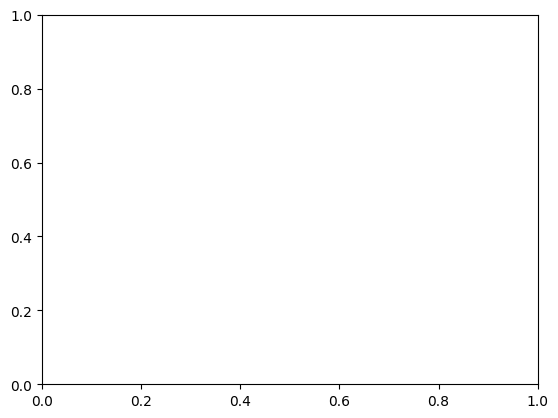

In [26]:
# Presentacion grafica de los resultados
print(X_train)
print(y_train)
plt.scatter(X_train, y_train, color='gray', label='Datos Entrenamiento')
plt.plot(X_train, model.predict(X_train), color='red', linewidth=3, label='Línea de regresión')
plt.xlabel('Ingreso Medio (MEDINC)')
plt.ylabel('Precio Promedio (Target) (en 100,000s')
plt.title('Regresión Lineal Ingreso Medio vs Precio Promedio (Target) - TrainData')
plt.legend()
plt.show()

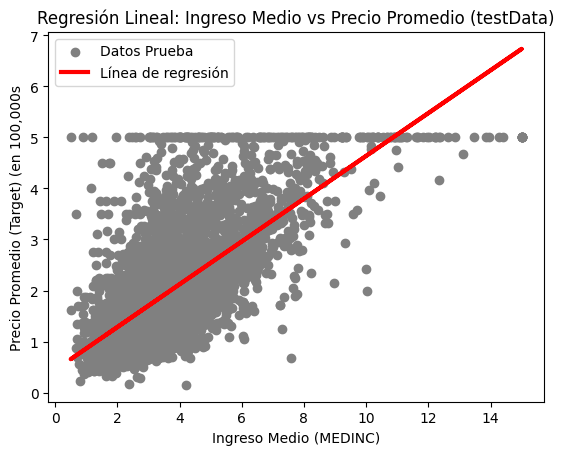

In [17]:
# VISUALIZE TEST SET RESULTS
# Graficar los resultados
plt.scatter(X_test, y_test, color='gray', label='Datos Prueba')
plt.plot(X_test, model.predict(X_test), color='red', linewidth=3, label='Línea de regresión')
plt.xlabel('Ingreso Medio (MEDINC)')
plt.ylabel('Precio Promedio (Target) (en 100,000s')
plt.title('Regresión Lineal: Ingreso Medio vs Precio Promedio (testData)')
plt.legend()
plt.show()

In [18]:
# evaluacion  del comportamiento del modelo (Error Cuadratico)
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.7091157771765549
Root Mean Squared Error: 0.8420901241414455


In [19]:
# evaluacion comportamiento del modelo (Error Absoluto)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.629908653009376


In [20]:
# evaluando el comportamiento del modelo (R Cuadrado)
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.45885918903846656


In [21]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


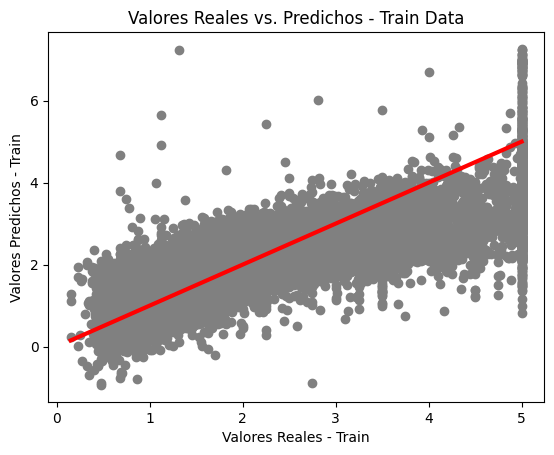

In [27]:
#X = california.data  # Todas las características
#y = california.target  # Precio de la casa "MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup" 0
df2 = df
#X = df2[["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup"]]
#y = df2[["Target"]]

X = df2.drop('Target', axis=1)
y = df2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_pred = model.predict(X_train)

#Graficar los valores predichos vs. reales para el conjunto de entrenamiento
plt.scatter(y_train, y_train_pred, color='gray')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', linewidth=3)
plt.xlabel('Valores Reales - Train')
plt.ylabel('Valores Predichos - Train')
plt.title('Valores Reales vs. Predichos - Train Data')
plt.show()


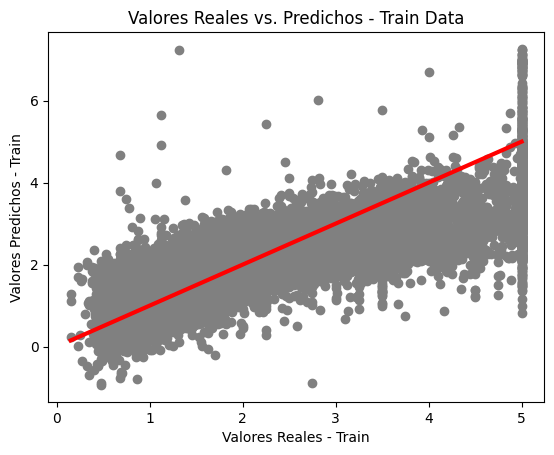

In [28]:
#Graficar los valores predichos vs. reales para el conjunto de entrenamiento
plt.scatter(y_train, y_train_pred, color='gray')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', linewidth=3)
plt.xlabel('Valores Reales - Train')
plt.ylabel('Valores Predichos - Train')
plt.title('Valores Reales vs. Predichos - Train Data')
plt.show()

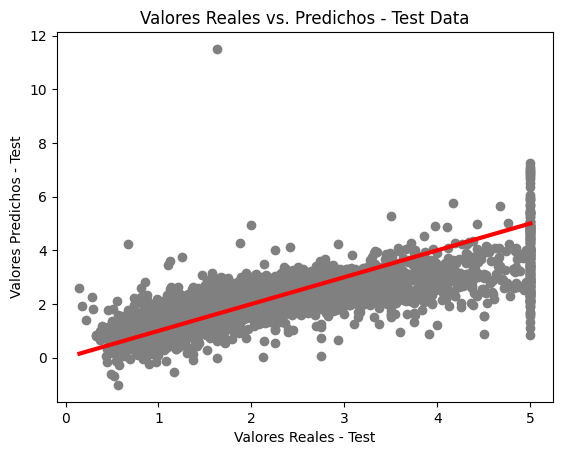

In [29]:
# VISUALIZE TEST SET RESULTS
# Graficar los resultados

y_test_pred = model.predict(X_test)

plt.scatter(y_test, y_test_pred, color='gray')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', linewidth=3)
plt.xlabel('Valores Reales - Test')
plt.ylabel('Valores Predichos - Test')
plt.title('Valores Reales vs. Predichos - Test Data')
plt.show()

In [30]:
# evaluando el comportamiento del modelo (Error Cuadratico)
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.5558915986952444
Root Mean Squared Error: 0.7455813830127764


In [31]:
# evaluando el comportamiento del modelo (Error Absoluto)
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 0.5332001304956553


In [32]:
# evaluando el comportamiento del modelo (R Cuadrado)
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: 0.5757877060324508


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [34]:
# Cargar el conjunto de datos de California Housing
california = fetch_california_housing()


In [35]:
X = california.data  # Todas las características
y = california.target  # Precio de la casa


In [36]:
# Aplicar la transformación logarítmica a la variable dependiente
y_log = np.log(y)

In [37]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.20, random_state=42)


In [38]:
# Crear el modelo de regresión lineal
model = LinearRegression()

In [39]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predecir los valores para el conjunto de prueba
y_pred_log = model.predict(X_test)

In [41]:
# Transformar las predicciones de vuelta a la escala original
y_pred = np.exp(y_pred_log)

In [42]:
# Calcular el coeficiente de determinación R^2 y el error cuadrático medio
r2 = r2_score(y_test, y_pred_log)
mse = mean_squared_error(np.exp(y_test), y_pred)
print(f'Coeficiente de determinación R^2: {r2:.2f}')
print(f'Error cuadrático medio: {mse:.2f}')

Coeficiente de determinación R^2: 0.59
Error cuadrático medio: 2.34


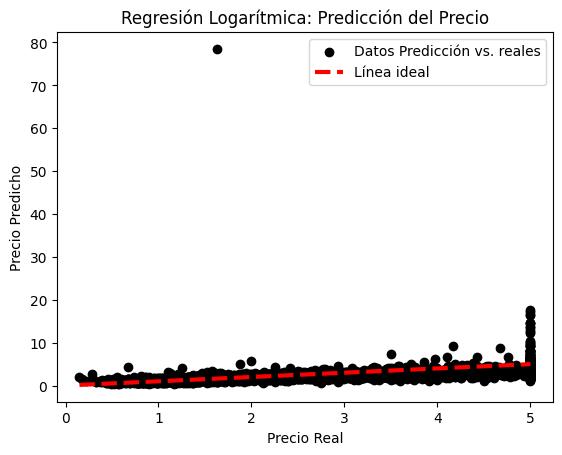

In [43]:
# Graficar los resultados
plt.scatter(np.exp(y_test), y_pred, color='black', label='Datos Predicción vs. reales')
plt.plot([np.exp(y_test).min(), np.exp(y_test).max()], [np.exp(y_test).min(), np.exp(y_test).max()], 'r--', lw=3, label='Línea ideal')
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Regresión Logarítmica: Predicción del Precio')
plt.legend()
plt.show()


regresion polinomial

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

Coeficiente de determinación R^2: 0.46
Error cuadrático medio: 0.70


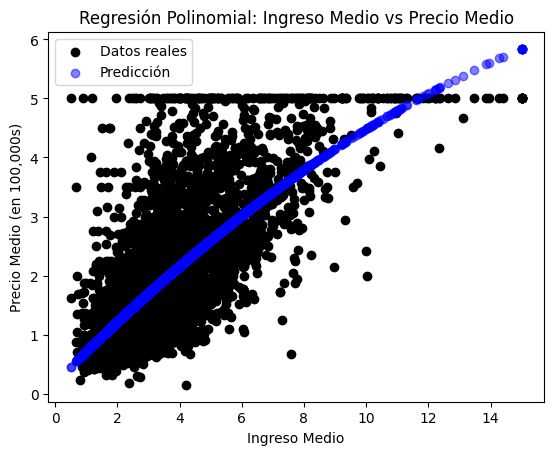

In [45]:
# Cargar el conjunto de datos de California Housing
california = fetch_california_housing()
X = california.data[:, [0]]  # MedInc (ingreso medio)
y = california.target  # Precio de la casa
# Aplicar la transformación polinomial a las características (usaremos un polinomio de grado 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir los valores para el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el coeficiente de determinación R^2 y el error cuadrático medio
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Coeficiente de determinación R^2: {r2:.2f}')
print(f'Error cuadrático medio: {mse:.2f}')

# Graficar los resultados
plt.scatter(X_test[:, 1], y_test, color='black', label='Datos reales')
plt.scatter(X_test[:, 1], y_pred, color='blue', label='Predicción', alpha=0.5)
plt.xlabel('Ingreso Medio')
plt.ylabel('Precio Medio (en 100,000s)')
plt.title('Regresión Polinomial: Ingreso Medio vs Precio Medio')
plt.legend()
plt.show()